In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import sklearn.metrics as metrics

In [59]:
data = pd.read_csv('/Users/nikita/Downloads/dirty_data.csv')

In [60]:
data

,Unnamed: 0,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,0,West,Sandy,Cotton,0.000000,27.676966,False,True,Cloudy,122,6.555816
1,1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,3,North,Sandy,Soybean,0.000000,16.644190,False,True,Rainy,146,6.517573
4,4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [61]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [62]:
data = pd.get_dummies(data=data, columns=['Crop', 'Soil_Type', 'Region', 'Weather_Condition'])

In [64]:
data

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Region_East,Region_North,Region_South,Region_West,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,0.000000,27.676966,False,True,122,6.555816,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
1,992.673282,18.026142,True,True,140,8.527341,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,1.127443,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.000000,16.644190,False,True,146,6.517573,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,730.379174,31.620687,True,True,110,7.248251,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302.805345,27.987428,False,False,76,1.347586,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
999996,932.991383,39.661039,True,False,93,7.311594,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
999997,867.362046,24.370042,True,False,108,5.763182,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
999998,492.812857,33.045505,False,False,102,2.070159,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True


Preprocessing

In [70]:
for i in data.columns:
    data[i] = data[i].replace(0, data[i].median())


In [72]:
data.Yield_tons_per_hectare=data.Yield_tons_per_hectare.apply(lambda x: 1 if x >= 6.555816 else 0)

In [74]:
data

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Region_East,Region_North,Region_South,Region_West,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,549.285638,27.676966,False,True,122,1,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
1,992.673282,18.026142,True,True,140,1,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,549.285638,16.644190,False,True,146,0,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,730.379174,31.620687,True,True,110,1,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302.805345,27.987428,False,False,76,0,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
999996,932.991383,39.661039,True,False,93,1,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
999997,867.362046,24.370042,True,False,108,0,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
999998,492.812857,33.045505,False,False,102,0,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True


In [76]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Region_East,Region_North,Region_South,Region_West,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
Rainfall_mm,1.000000,-0.000156,-0.001071,-0.000545,-0.002672,0.466262,-0.000786,-0.000100,-0.001361,0.000946,0.000850,0.000452,0.001915,-0.001153,-0.000607,0.000538,-0.000617,-0.000078,-0.001620,0.001798,0.000090,-0.000269,-0.001483,0.000491,0.000990
Temperature_Celsius,-0.000156,1.000000,0.002405,-0.000502,-0.000737,0.056775,-0.000225,0.001431,-0.001711,-0.000394,0.000271,0.000630,-0.000030,-0.000742,-0.001549,0.001699,0.000562,0.000061,-0.000154,-0.000692,-0.000157,0.001003,0.001238,-0.001059,-0.000178
Fertilizer_Used,-0.001071,0.002405,1.000000,0.001510,-0.001029,0.305327,-0.000609,0.000598,-0.001330,0.000397,-0.000142,0.001087,-0.000759,-0.001697,0.001923,-0.000964,0.000485,0.001009,-0.000257,-0.000635,0.000568,0.000323,0.000558,-0.002229,0.001671
Irrigation_Used,-0.000545,-0.000502,0.001510,1.000000,-0.001234,0.233294,0.000013,0.000018,0.000418,-0.002774,0.001150,0.001177,0.000249,-0.000619,0.000882,0.000957,-0.000742,-0.000725,-0.000085,0.000230,-0.000765,0.000620,0.000012,0.000939,-0.000950
Days_to_Harvest,-0.002672,-0.000737,-0.001029,-0.001234,1.000000,-0.003735,-0.001196,0.000668,0.000757,0.000101,-0.000673,0.000342,-0.000405,-0.000789,-0.000186,0.001896,-0.000812,0.000297,0.000901,0.000168,-0.000019,-0.001050,0.000022,0.000643,-0.000665
Yield_tons_per_hectare,0.466262,0.056775,0.305327,0.233294,-0.003735,1.000000,0.000634,0.000321,-0.001031,-0.000504,0.001218,-0.000636,0.001769,-0.002369,0.000261,0.000959,0.000137,-0.000758,-0.000794,-0.000062,0.000764,0.000091,-0.000221,-0.000954,0.001175
Crop_Barley,-0.000786,-0.000225,-0.000609,0.000013,-0.001196,0.000634,1.000000,-0.200021,-0.200193,-0.200170,-0.199851,-0.200084,-0.000525,-0.000127,0.000564,0.000899,-0.000867,0.000057,-0.000323,0.000328,0.000005,-0.000010,-0.000451,0.001244,-0.000794
Crop_Cotton,-0.000100,0.001431,0.000598,0.000018,0.000668,0.000321,-0.200021,1.000000,-0.200054,-0.200031,-0.199713,-0.199946,0.000246,0.000160,0.000133,-0.000059,0.000831,-0.001311,0.001549,-0.000812,-0.000944,0.000207,-0.001523,0.000300,0.001221
Crop_Maize,-0.001361,-0.001711,-0.001330,0.000418,0.000757,-0.001031,-0.200193,-0.200054,1.000000,-0.200204,-0.199884,-0.200118,0.000448,-0.000868,0.000594,0.000569,-0.000658,-0.000086,-0.000779,0.000589,0.000062,0.000128,-0.000973,0.000097,0.000875
Crop_Rice,0.000946,-0.000394,0.000397,-0.002774,0.000101,-0.000504,-0.200170,-0.200031,-0.200204,1.000000,-0.199861,-0.200095,-0.000514,0.001540,-0.000576,-0.001050,-0.000511,0.001112,-0.000823,0.001227,-0.000000,-0.000405,-0.000861,0.000118,0.000742


Text(0, 0.5, 'Tonns')

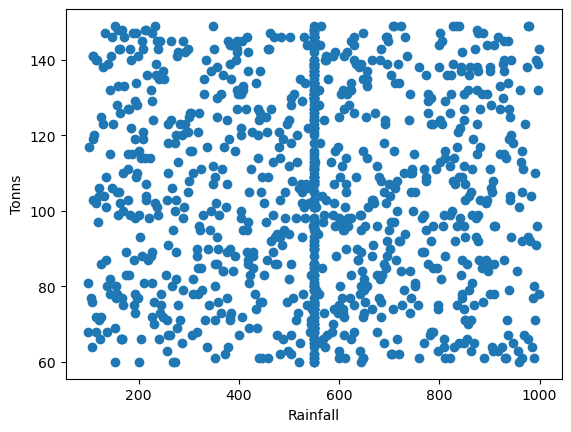

In [78]:
plt.scatter(x=data['Rainfall_mm'].loc[:1000], y=data['Days_to_Harvest'].loc[:1000])
plt.xlabel('Rainfall')
plt.ylabel('Tonns')

Boxplot

In [29]:
data.dtypes

Rainfall_mm                 float64
Temperature_Celsius         float64
Fertilizer_Used                bool
Irrigation_Used                bool
Days_to_Harvest               int64
Yield_tons_per_hectare      float64
Crop_Barley                    bool
Crop_Cotton                    bool
Crop_Maize                     bool
Crop_Rice                      bool
Crop_Soybean                   bool
Crop_Wheat                     bool
Soil_Type_Chalky               bool
Soil_Type_Clay                 bool
Soil_Type_Loam                 bool
Soil_Type_Peaty                bool
Soil_Type_Sandy                bool
Soil_Type_Silt                 bool
Region_East                    bool
Region_North                   bool
Region_South                   bool
Region_West                    bool
Weather_Condition_Cloudy       bool
Weather_Condition_Rainy        bool
Weather_Condition_Sunny        bool
dtype: object

In [83]:
f_types = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']

In [85]:
for column in f_types:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1 

    filter = (data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 *IQR)
    
    data = data.loc[filter]  




{'whiskers': [<matplotlib.lines.Line2D at 0x1578f7080>,
 'caps': [<matplotlib.lines.Line2D at 0x1578f7680>,
 'boxes': [<matplotlib.lines.Line2D at 0x1578f6e40>,
 'medians': [<matplotlib.lines.Line2D at 0x1578f7ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1578f7dd0>,
 'means': []}

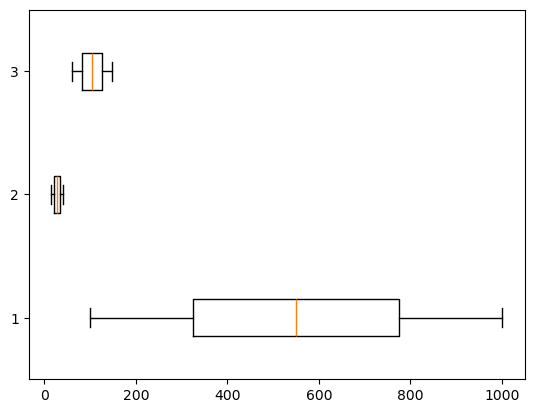

In [87]:
plt.boxplot(x=data[f_types], vert=False)


Text(0.5, 0, 'Rain_mms')

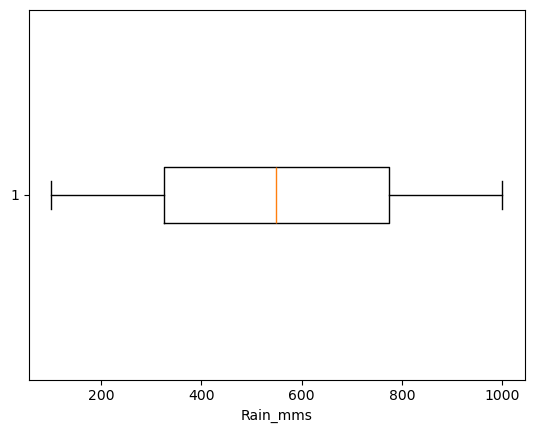

In [94]:
plt.boxplot(x=data['Rainfall_mm'], vert=False)
plt.xlabel('Rain_mms')

<Axes: >

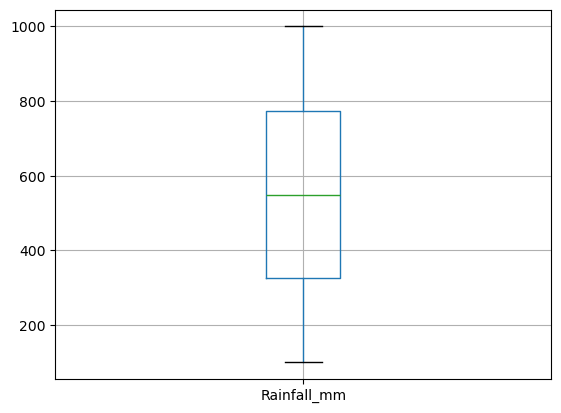

In [89]:
data.boxplot('Rainfall_mm')

array([[<Axes: title={'center': 'Rainfall_mm'}>,
        <Axes: title={'center': 'Temperature_Celsius'}>],
       [<Axes: title={'center': 'Days_to_Harvest'}>,
        <Axes: title={'center': 'Yield_tons_per_hectare'}>]], dtype=object)

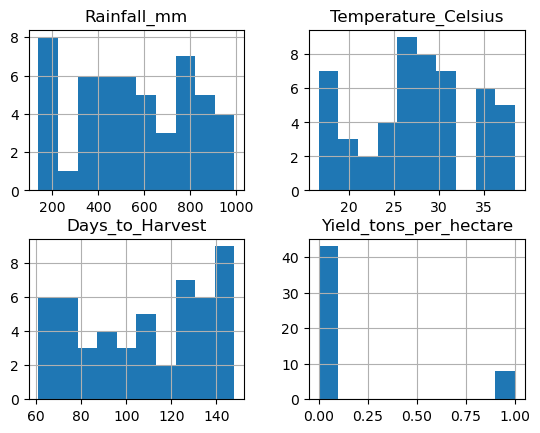

In [47]:
data.loc[:50].hist()

In [159]:
data.dtypes

Rainfall_mm                 float64
Temperature_Celsius         float64
Fertilizer_Used                bool
Irrigation_Used                bool
Days_to_Harvest               int64
Yield_tons_per_hectare        int64
Crop_Barley                    bool
Crop_Cotton                    bool
Crop_Maize                     bool
Crop_Rice                      bool
Crop_Soybean                   bool
Crop_Wheat                     bool
Soil_Type_Chalky               bool
Soil_Type_Clay                 bool
Soil_Type_Loam                 bool
Soil_Type_Peaty                bool
Soil_Type_Sandy                bool
Soil_Type_Silt                 bool
Region_East                    bool
Region_North                   bool
Region_South                   bool
Region_West                    bool
Weather_Condition_Cloudy       bool
Weather_Condition_Rainy        bool
Weather_Condition_Sunny        bool
dtype: object

In [100]:
data

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Region_East,Region_North,Region_South,Region_West,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,549.285638,27.676966,False,True,122,1,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
1,992.673282,18.026142,True,True,140,1,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,549.285638,16.644190,False,True,146,0,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,730.379174,31.620687,True,True,110,1,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302.805345,27.987428,False,False,76,0,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
999996,932.991383,39.661039,True,False,93,1,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
999997,867.362046,24.370042,True,False,108,0,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
999998,492.812857,33.045505,False,False,102,0,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True


Обучение

In [102]:
data_pre, data_test = data.loc[:900000], data.loc[900000:]

In [104]:
X, y = data_pre.drop('Yield_tons_per_hectare', axis=1), data_pre['Yield_tons_per_hectare'] #y = X*w + e

In [106]:
X

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Region_East,Region_North,Region_South,Region_West,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,549.285638,27.676966,False,True,122,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
1,992.673282,18.026142,True,True,140,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,549.285638,16.644190,False,True,146,False,False,False,False,True,...,False,True,False,False,True,False,False,False,True,False
4,730.379174,31.620687,True,True,110,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899996,955.040695,28.991123,True,False,111,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
899997,942.642402,16.212182,True,True,83,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
899998,371.653222,36.457623,True,True,119,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
899999,423.380484,17.132135,True,False,112,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [108]:
y

0         1
1         1
2         0
3         0
4         1
         ..
899996    1
899997    1
899998    0
899999    0
900000    0
Name: Yield_tons_per_hectare, Length: 900001, dtype: int64

In [110]:
X_test, y_test = data_test.drop('Yield_tons_per_hectare', axis=1), data_test['Yield_tons_per_hectare']

In [112]:
scaler = StandardScaler() #x_new = (x - x_mean) / disp
X_train_scaled = scaler.fit_transform(X, y)
X_test_scaled = scaler.fit_transform(X_test, y_test)

In [113]:
X_train_scaled


array([[-0.00213714,  0.02400589, -0.99962785, ...,  1.41637062,
        -0.70797081, -0.7073201 ],
       [ 1.70609754, -1.31392674,  1.00037229, ..., -0.7060299 ,
         1.41248762, -0.7073201 ],
       [-1.5481735 ,  0.31750467, -0.99962785, ..., -0.7060299 ,
        -0.70797081,  1.41378705],
       ...,
       [-0.68649959,  1.24130372,  1.00037229, ...,  1.41637062,
        -0.70797081, -0.7073201 ],
       [-0.48721054, -1.43786662,  1.00037229, ..., -0.7060299 ,
         1.41248762, -0.7073201 ],
       [ 0.77425152,  1.27882281, -0.99962785, ..., -0.7060299 ,
        -0.70797081,  1.41378705]])

In [116]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y, test_size=0.3, random_state=17)

K-Nearest Neighbors - К ближайших соседей

In [234]:
k_clf = KNN()

In [236]:
params={'n_neighbors': range(1, 10)}

In [238]:
best_k = RandomizedSearchCV(estimator=k_clf, param_distributions=params)

In [240]:
best_k.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 10)})

In [242]:
best_k.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [244]:
predict = best_k.predict(X_val)

In [252]:
accuracy_score = accuracy_score(y_val, predict) 

In [254]:
accuracy_score

0.9319465588064257

In [256]:
#0.9319465588064257

In [258]:
precision = precision_score(y_val, predict)

In [260]:
precision

0.813229695431472

In [262]:
recall = recall_score(y_val, predict)

In [264]:
recall

0.6724468113014507

In [266]:
f1 = f1_score(y_val, predict)

In [268]:
f1

0.7361679518660521

In [270]:
roc_auc = roc_auc_score(y_val, predict)

In [272]:
roc_auc

0.8235282447777847

In [ ]:
#0.8235282447777847

In [274]:
predict

array([1, 0, 0, ..., 0, 0, 0])

In [290]:
fpr, tpr, threshold = metrics.roc_curve(y_val, predict)

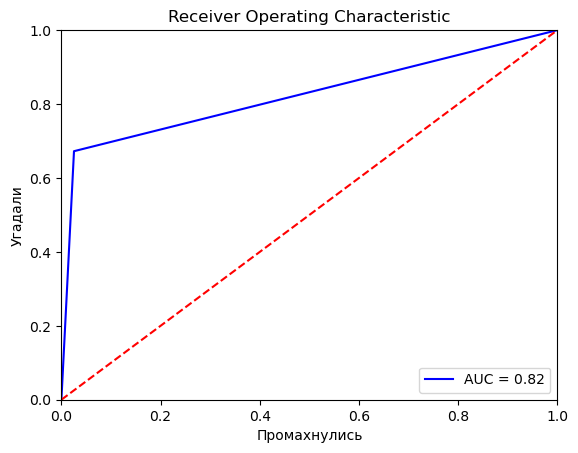

In [296]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Угадали')
plt.xlabel('Промахнулись')
plt.show()

In [304]:
test_predict_knn = best_k.predict(X_test_scaled)

In [308]:
accuracy_knn = accuracy_score(y_test,test_predict_knn)


In [310]:
accuracy_knn

0.9310110314340865

In [312]:
precision_knn = precision_score(y_test,test_predict_knn)

In [314]:
precision_knn

0.8130046383782855

In [316]:
recall_knn = recall_score(y_test,test_predict_knn)

In [318]:
recall_knn

0.6672071055970675

In [322]:
f1score_knn = f1_score(y_test,test_predict_knn)

In [324]:
f1score_knn

0.7329255072014867

In [326]:
roc_auc_knn = roc_auc_score(y_test, test_predict_knn)

In [328]:
roc_auc_knn

0.8209172204714047

In [336]:
#0.8209172204714047

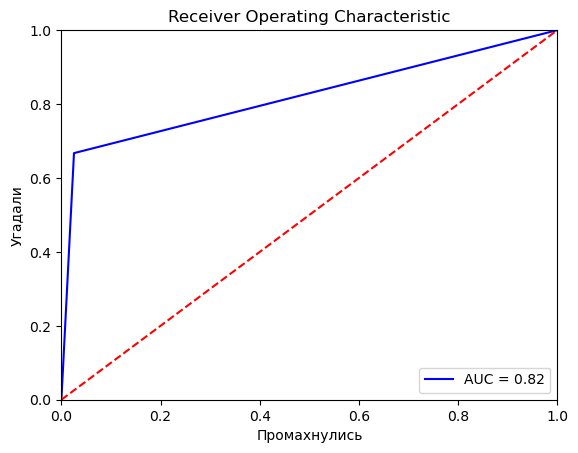

In [334]:
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_test, test_predict_knn)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Угадали')
plt.xlabel('Промахнулись')
plt.show()

-SVM-

In [354]:
svc = LinearSVC(dual=False)

In [364]:
svm_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [366]:
best_svc = GridSearchCV(svc, param_grid=svm_params)

In [368]:
best_svc.fit(X_train, y_train)

GridSearchCV(estimator=LinearSVC(dual=False),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [370]:
best_svc.best_estimator_

LinearSVC(C=0.01, dual=False)

In [372]:
pred_svc_val = best_svc.predict(X_val)

In [374]:
acc_svc_val = accuracy_score(y_val, pred_svc_val)

In [376]:
acc_svc_val

0.9427362868963882

In [378]:
precision_svc_val, recall_svc_vall, f1_svc_val, roc_auc_svc_val = precision_score(y_val, pred_svc_val), recall_score(y_val, pred_svc_val), f1_score(y_val, pred_svc_val), roc_auc_score(y_val, pred_svc_val)

In [380]:
precision_svc_val, recall_svc_vall, f1_svc_val, roc_auc_svc_val

(0.8196180212711937,
 0.7621658490516541,
 0.7898485713508958,
 0.8672944314696724)

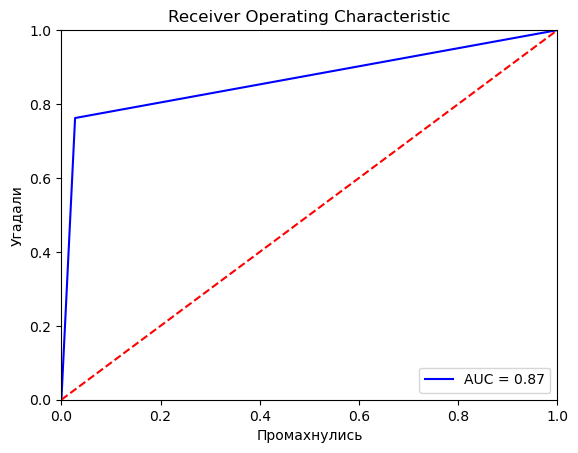

In [382]:
fpr_svc_val, tpr_svc_val, threshold_svc_val = metrics.roc_curve(y_val, pred_svc_val)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svc_val, tpr_svc_val, 'b', label = 'AUC = %0.2f' % roc_auc_svc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Угадали')
plt.xlabel('Промахнулись')
plt.show()

In [390]:
pred_svc = best_svc.predict(X_test_scaled)

In [394]:
acc_svc = accuracy_score(y_test, pred_svc)

In [396]:
acc_svc

0.9413723784091932

In [398]:
precision_svc, recall_svc, f1_svc, roc_auc_svc = precision_score(y_test, pred_svc), recall_score(y_test, pred_svc), f1_score(y_test, pred_svc), roc_auc_score(y_test, pred_svc)

In [400]:
precision_svc, recall_svc, f1_svc, roc_auc_svc

(0.8171772595640908,
 0.7558860848724094,
 0.7853376299985352,
 0.8639630188933556)

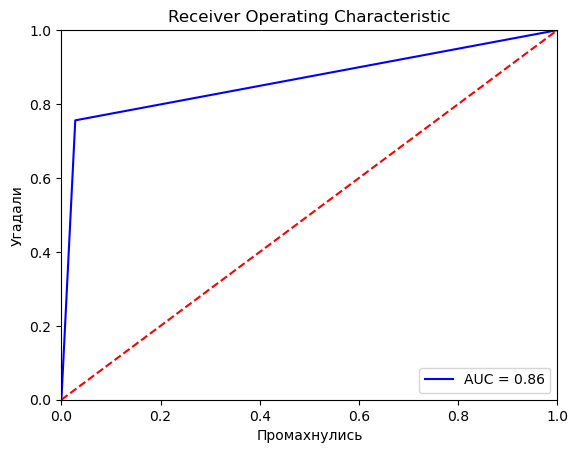

In [402]:
fpr_svc, tpr_svc, threshold_svc = metrics.roc_curve(y_test, pred_svc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svc, tpr_svc, 'b', label = 'AUC = %0.2f' % roc_auc_svc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Угадали')
plt.xlabel('Промахнулись')
plt.show()

RandomForrest

In [427]:
clf = RandomForestClassifier(n_jobs=-1)

In [467]:
params_clf = {'n_estimators': [400, 450], 'max_depth': [14]}

In [469]:
best_clf = RandomizedSearchCV(clf, param_distributions=params_clf)

In [473]:
best_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [14],
                                        'n_estimators': [400, 450]})

In [475]:
best_clf.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=450, n_jobs=-1)

In [479]:
pred_clf_val = best_clf.predict(X_val)

In [481]:
acc_clf_val = accuracy_score(y_val, pred_clf_val)

In [483]:
acc_clf_val

0.9406138995995985

In [493]:
pred_clf = best_clf.predict(X_test_scaled)

In [496]:
acc_clf = accuracy_score(y_test, pred_clf)

In [498]:
acc_clf

0.939482132677248

In [500]:
precision_clf, recall_clf, f1_clf, roc_auc_clf= precision_score(y_test, pred_clf), recall_score(y_test, pred_clf), f1_score(y_test, pred_clf), roc_auc_score(y_test, pred_clf)

In [502]:
precision_clf, recall_clf, f1_clf, roc_auc_clf

(0.847679288828105, 0.6990695051459185, 0.7662352713926984, 0.8391502582197466)

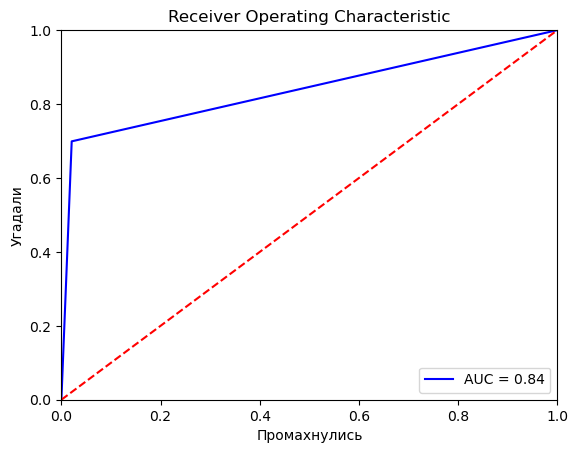

In [504]:
fpr_clf, tpr_clf, threshold_clf = metrics.roc_curve(y_test, pred_clf)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_clf, tpr_clf, 'b', label = 'AUC = %0.2f' % roc_auc_clf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Угадали')
plt.xlabel('Промахнулись')
plt.show()

In [96]:
r_clf = RandomForestClassifier(n_estimators=450, max_depth=14, n_jobs=-1)

In [118]:
r_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=450, n_jobs=-1)

In [120]:
r_clf.feature_importances_

array([0.55732496, 0.03226925, 0.23418795, 0.13949928, 0.01785843,
       0.00088111, 0.00087167, 0.000868  , 0.00087901, 0.00087827,
       0.00086385, 0.00085936, 0.00080931, 0.0008653 , 0.00084082,
       0.00086592, 0.00082811, 0.00114584, 0.00116156, 0.00116669,
       0.00116227, 0.00131205, 0.00130665, 0.00129433])

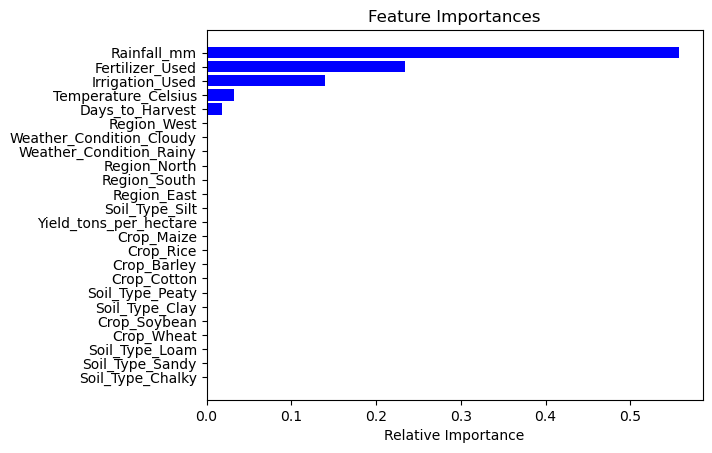

In [122]:
features = data.columns
importances = r_clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()